### Import Libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

### Use pandas to read csv file and put it into a dataframe

In [2]:
df_movies = pd.read_csv("TMDBMovieData.csv")
df_movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Filtering out the columns of interest

In [3]:
df_movies_relevant = df_movies[['movie_title', 'title_year', 'duration', 'content_rating', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name', 'gross', 'budget', 'genres', 'country', 'imdb_score', 'movie_facebook_likes']]
df_movies_relevant

,movie_title,title_year,duration,content_rating,actor_1_name,actor_2_name,actor_3_name,director_name,gross,budget,genres,country,imdb_score,movie_facebook_likes
0,Avatar,2009.0,178.0,PG-13,CCH Pounder,Joel David Moore,Wes Studi,James Cameron,760505847.0,237000000.0,Action|Adventure|Fantasy|Sci-Fi,USA,7.9,33000
1,Pirates of the Caribbean: At World's End,2007.0,169.0,PG-13,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski,309404152.0,300000000.0,Action|Adventure|Fantasy,USA,7.1,0
2,Spectre,2015.0,148.0,PG-13,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes,200074175.0,245000000.0,Action|Adventure|Thriller,UK,6.8,85000
3,The Dark Knight Rises,2012.0,164.0,PG-13,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan,448130642.0,250000000.0,Action|Thriller,USA,8.5,164000
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,Doug Walker,Rob Walker,NaN,Doug Walker,NaN,NaN,Documentary,NaN,7.1,0
5,John Carter,2012.0,132.0,PG-13,Daryl Sabara,Samantha Morton,Polly Walker,Andrew Stanton,73058679.0,263700000.0,Action|Adventure|Sci-Fi,USA,6.6,24000
6,Spider-Man 3,2007.0,156.0,PG-13,J.K. Simmons,James Franco,Kirsten Dunst,Sam Raimi,336530303.0,258000000.0,Action|Adventure|Romance,USA,6.2,0
7,Tangled,2010.0,100.0,PG,Brad Garrett,Donna Murphy,M.C. Gainey,Nathan Greno,200807262.0,260000000.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,USA,7.8,29000
8,Avengers: Age of Ultron,2015.0,141.0,PG-13,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Joss Whedon,458991599.0,250000000.0,Action|Adventure|Sci-Fi,USA,7.5,118000
9,Harry Potter and the Half-Blood Prince,2009.0,153.0,PG,Alan Rickman,Daniel Radcliffe,Rupert Grint,David Yates,301956980.0,250000000.0,Adventure|Family|Fantasy|Mystery,UK,7.5,10000


### Drop N/A Values
- Deletes entire row if it contains any N/A values.  Necessary to filter out all of the bad entries that will give errors later on

- This deletes 1209 rows that contain N/A values.  These are likely from inconsistant data, probably human error.  These incomplete rows cause issues with computing data and importing to sql database later, so we're going to trade quantity for accuracy 

In [4]:
df_movies_relevant = df_movies_relevant.dropna()
df_movies_relevant

,movie_title,title_year,duration,content_rating,actor_1_name,actor_2_name,actor_3_name,director_name,gross,budget,genres,country,imdb_score,movie_facebook_likes
0,Avatar,2009.0,178.0,PG-13,CCH Pounder,Joel David Moore,Wes Studi,James Cameron,760505847.0,237000000.0,Action|Adventure|Fantasy|Sci-Fi,USA,7.9,33000
1,Pirates of the Caribbean: At World's End,2007.0,169.0,PG-13,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski,309404152.0,300000000.0,Action|Adventure|Fantasy,USA,7.1,0
2,Spectre,2015.0,148.0,PG-13,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes,200074175.0,245000000.0,Action|Adventure|Thriller,UK,6.8,85000
3,The Dark Knight Rises,2012.0,164.0,PG-13,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan,448130642.0,250000000.0,Action|Thriller,USA,8.5,164000
5,John Carter,2012.0,132.0,PG-13,Daryl Sabara,Samantha Morton,Polly Walker,Andrew Stanton,73058679.0,263700000.0,Action|Adventure|Sci-Fi,USA,6.6,24000
6,Spider-Man 3,2007.0,156.0,PG-13,J.K. Simmons,James Franco,Kirsten Dunst,Sam Raimi,336530303.0,258000000.0,Action|Adventure|Romance,USA,6.2,0
7,Tangled,2010.0,100.0,PG,Brad Garrett,Donna Murphy,M.C. Gainey,Nathan Greno,200807262.0,260000000.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,USA,7.8,29000
8,Avengers: Age of Ultron,2015.0,141.0,PG-13,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Joss Whedon,458991599.0,250000000.0,Action|Adventure|Sci-Fi,USA,7.5,118000
9,Harry Potter and the Half-Blood Prince,2009.0,153.0,PG,Alan Rickman,Daniel Radcliffe,Rupert Grint,David Yates,301956980.0,250000000.0,Adventure|Family|Fantasy|Mystery,UK,7.5,10000
10,Batman v Superman: Dawn of Justice,2016.0,183.0,PG-13,Henry Cavill,Lauren Cohan,Alan D. Purwin,Zack Snyder,330249062.0,250000000.0,Action|Adventure|Sci-Fi,USA,6.9,197000


### Drop Duplicate Values
- Deletes duplicate rows that are unnecessary
- This will delete 100 identical rows

In [5]:
df_movies_relevant.drop_duplicates(subset=None, keep='first', inplace=False)

,movie_title,title_year,duration,content_rating,actor_1_name,actor_2_name,actor_3_name,director_name,gross,budget,genres,country,imdb_score,movie_facebook_likes
0,Avatar,2009.0,178.0,PG-13,CCH Pounder,Joel David Moore,Wes Studi,James Cameron,760505847.0,237000000.0,Action|Adventure|Fantasy|Sci-Fi,USA,7.9,33000
1,Pirates of the Caribbean: At World's End,2007.0,169.0,PG-13,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski,309404152.0,300000000.0,Action|Adventure|Fantasy,USA,7.1,0
2,Spectre,2015.0,148.0,PG-13,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes,200074175.0,245000000.0,Action|Adventure|Thriller,UK,6.8,85000
3,The Dark Knight Rises,2012.0,164.0,PG-13,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan,448130642.0,250000000.0,Action|Thriller,USA,8.5,164000
5,John Carter,2012.0,132.0,PG-13,Daryl Sabara,Samantha Morton,Polly Walker,Andrew Stanton,73058679.0,263700000.0,Action|Adventure|Sci-Fi,USA,6.6,24000
6,Spider-Man 3,2007.0,156.0,PG-13,J.K. Simmons,James Franco,Kirsten Dunst,Sam Raimi,336530303.0,258000000.0,Action|Adventure|Romance,USA,6.2,0
7,Tangled,2010.0,100.0,PG,Brad Garrett,Donna Murphy,M.C. Gainey,Nathan Greno,200807262.0,260000000.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,USA,7.8,29000
8,Avengers: Age of Ultron,2015.0,141.0,PG-13,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Joss Whedon,458991599.0,250000000.0,Action|Adventure|Sci-Fi,USA,7.5,118000
9,Harry Potter and the Half-Blood Prince,2009.0,153.0,PG,Alan Rickman,Daniel Radcliffe,Rupert Grint,David Yates,301956980.0,250000000.0,Adventure|Family|Fantasy|Mystery,UK,7.5,10000
10,Batman v Superman: Dawn of Justice,2016.0,183.0,PG-13,Henry Cavill,Lauren Cohan,Alan D. Purwin,Zack Snyder,330249062.0,250000000.0,Action|Adventure|Sci-Fi,USA,6.9,197000


### Format Column Names

In [6]:
df_movies_relevant.columns = ['Title', 'Year', 'Length', 'Rating', 'Actor1', 'Actor2', 'Actor3', 'Director', 'Gross', 'Budget', 'Genres', 'Country', 'IMDB_Score', 'Facebook_Likes']
df_movies_relevant.head()

,Title,Year,Length,Rating,Actor1,Actor2,Actor3,Director,Gross,Budget,Genres,Country,IMDB_Score,Facebook_Likes
0,Avatar,2009.0,178.0,PG-13,CCH Pounder,Joel David Moore,Wes Studi,James Cameron,760505847.0,237000000.0,Action|Adventure|Fantasy|Sci-Fi,USA,7.9,33000
1,Pirates of the Caribbean: At World's End,2007.0,169.0,PG-13,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski,309404152.0,300000000.0,Action|Adventure|Fantasy,USA,7.1,0
2,Spectre,2015.0,148.0,PG-13,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes,200074175.0,245000000.0,Action|Adventure|Thriller,UK,6.8,85000
3,The Dark Knight Rises,2012.0,164.0,PG-13,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan,448130642.0,250000000.0,Action|Thriller,USA,8.5,164000
5,John Carter,2012.0,132.0,PG-13,Daryl Sabara,Samantha Morton,Polly Walker,Andrew Stanton,73058679.0,263700000.0,Action|Adventure|Sci-Fi,USA,6.6,24000


### Create SQLite3 Database
- Create tmdb.db
- Delete and overwrite any existing data in db file if it already exists
- Create table within database and fill it with data from pandas DataFrame

In [7]:
conn = sqlite3.connect('tmdb.db')
conn.execute('''DROP TABLE IF EXISTS tmdb''')
df_movies_relevant.to_sql('tmdb', conn)

### Use SQL to calculate number of movies by each director and then rank them by count

In [8]:
query = "SELECT Director, count(*) FROM tmdb GROUP BY Director ORDER BY COUNT(*) desc LIMIT 10"
df_Director_Top10 = pd.read_sql(query, conn)
df_Director_Top10.columns = ['Director', 'Frequency']
df_Director_Top10

,Director,Frequency
0,Steven Spielberg,25
1,Clint Eastwood,19
2,Woody Allen,19
3,Ridley Scott,17
4,Martin Scorsese,16
5,Steven Soderbergh,16
6,Tim Burton,16
7,Renny Harlin,15
8,Spike Lee,15
9,Barry Levinson,13


### Top 10 Movie Budgets

In [9]:
query = "SELECT Title, Budget FROM tmdb ORDER BY Budget desc LIMIT 10"
df_Budget_Top10 = pd.read_sql(query, conn)
df_Budget_Top10

,Title,Budget
0,The Host,1.221550e+10
1,Lady Vengeance,4.200000e+09
2,Fateless,2.500000e+09
3,Princess Mononoke,2.400000e+09
4,Steamboy,2.127520e+09
5,Akira,1.100000e+09
6,Godzilla 2000,1.000000e+09
7,Kabhi Alvida Naa Kehna,7.000000e+08
8,Tango,7.000000e+08
9,Red Cliff,5.536320e+08


### Top 10 Grossing Movies

In [10]:
query = "SELECT Title, Gross FROM tmdb ORDER BY Gross desc LIMIT 10"
df_Gross_Top10 = pd.read_sql(query, conn)
df_Gross_Top10

,Title,Gross
0,Avatar,760505847.0
1,Titanic,658672302.0
2,Jurassic World,652177271.0
3,The Avengers,623279547.0
4,The Avengers,623279547.0
5,The Dark Knight,533316061.0
6,Star Wars: Episode I - The Phantom Menace,474544677.0
7,Star Wars: Episode IV - A New Hope,460935665.0
8,Avengers: Age of Ultron,458991599.0
9,The Dark Knight Rises,448130642.0


### Number of total unique actors in database

In [11]:
query = "SELECT COUNT(*) AS 'Number of Unique Actors' FROM (SELECT DISTINCT Actor1, Actor2, Actor3 FROM tmdb)"
df_Unique_Actors = pd.read_sql(query, conn)
df_Unique_Actors

,Number of Unique Actors
0,3707


In [12]:
query = "SELECT COUNT(*) AS 'Number of Unique Directors' FROM (SELECT DISTINCT Director FROM tmdb)"
df_Unique_Directors = pd.read_sql(query, conn)
df_Unique_Directors

,Number of Unique Directors
0,1707


### Calculate the actors with the most movies
- Combine 3 actor columns
- Order by Count

In [13]:
query = """SELECT Actors, Count(*) as Count FROM
(
  SELECT Actor1 Actors FROM tmdb
  UNION ALL
  SELECT Actor2 as Actors FROM tmdb
  UNION ALL
  SELECT Actor3 as Actors FROM tmdb
) A
Group by Actors
ORDER BY Count desc LIMIT 10"""
    
df_Actors_Top10 = pd.read_sql(query, conn)
df_Actors_Top10

,Actors,Count
0,Robert De Niro,47
1,Morgan Freeman,44
2,Bruce Willis,39
3,Johnny Depp,39
4,Matt Damon,35
5,Brad Pitt,33
6,Bill Murray,32
7,Denzel Washington,32
8,Nicolas Cage,32
9,Steve Buscemi,32


In [14]:
conn.close()

### MatPlotLib Graphs

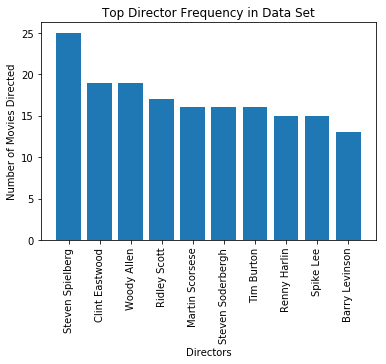

In [15]:
x_df = df_Director_Top10.Director
y_df = df_Director_Top10.Frequency
y_pos = np.arange(len(y_df))

plt.bar(y_pos, y_df, align='center', alpha=1)
plt.xticks(y_pos, x_df)

plt.xticks(rotation=90)

plt.ylabel('Number of Movies Directed')
plt.xlabel('Directors')
plt.title('Top Director Frequency in Data Set')

plt.show()

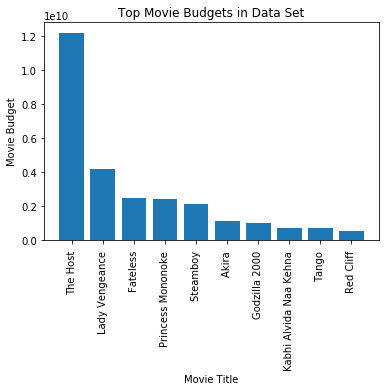

In [16]:
x_df = df_Budget_Top10.Title
y_df = df_Budget_Top10.Budget
y_pos = np.arange(len(y_df))

plt.bar(y_pos, y_df, align='center', alpha=1)
plt.xticks(y_pos, x_df)

plt.xticks(rotation=90)

plt.ylabel('Movie Budget')
plt.xlabel('Movie Title')
plt.title('Top Movie Budgets in Data Set')

plt.show()

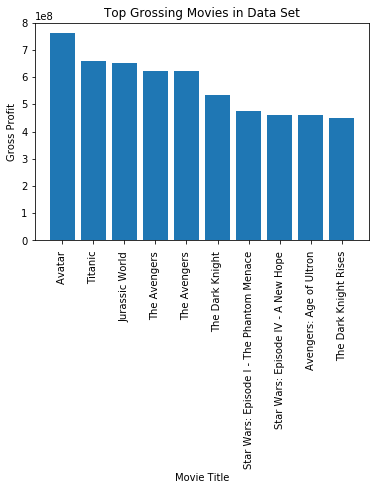

In [17]:
x_df = df_Gross_Top10.Title
y_df = df_Gross_Top10.Gross
y_pos = np.arange(len(y_df))

plt.bar(y_pos, y_df, align='center', alpha=1)
plt.xticks(y_pos, x_df)

plt.xticks(rotation=90)

plt.ylabel('Gross Profit')
plt.xlabel('Movie Title')
plt.title('Top Grossing Movies in Data Set')

plt.show()

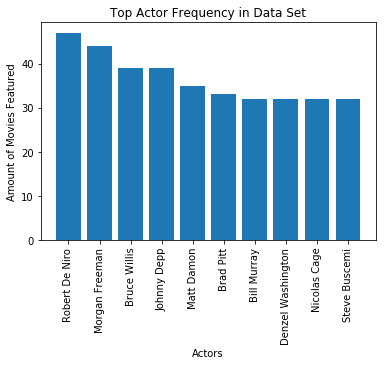

In [18]:
x_df = df_Actors_Top10.Actors
y_df = df_Actors_Top10.Count
y_pos = np.arange(len(y_df))

plt.bar(y_pos, y_df, align='center', alpha=1)
plt.xticks(y_pos, x_df)

plt.xticks(rotation=90)

plt.ylabel('Amount of Movies Featured')
plt.xlabel('Actors')
plt.title('Top Actor Frequency in Data Set')

plt.show()

- These last 2 Bokeh graphs are still a work in progress.  The matplotlib graphs are enough to pass the project, these are what I have been working on after completing the project requirements

## The following 2 cells are not part of the final project, they are graphs that I am working on in bokeh

In [19]:
from bokeh.plotting import figure, show

categories = x_df
data = y_df

p = figure(x_range=categories)
p.vbar(x=categories, top=data, width=0.9)

show(p)

output_file("bars.html")

p = figure(x_range=x_df, plot_height=250, title="Fruit Counts",
           toolbar_location=None, tools="")

p.vbar(x=x_df, top=y_df, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)